# 3D graph of opinion spread

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


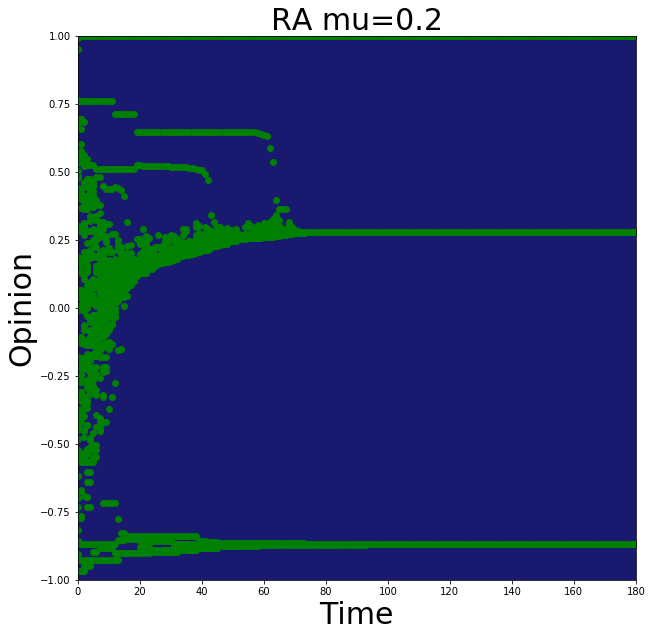

In [325]:
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import csv
from collections import defaultdict, Counter

step = []
opinions = []
cs = []

model_name = 'RA'

with open(model_name+'opinions.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    for row in readCSV:
        ntime=row[1]
        for opinion in row[4:]:
            if opinion != ' ':
                opinions.append(float(opinion))
                step.append(float(ntime))
                
fig = plt.figure(3, figsize=(10,10))
plt.xlabel('Time', fontsize=30)
plt.ylabel('Opinion', fontsize=30)
plt.title(model_name +" mu=0.2", fontsize=30)
# p3 = scatter(step, smiddle, step, slower, step, supper)
ax=plt.axes()
ax.set_facecolor('midnightblue')
p3 = plt.scatter(step, opinions, c="green")
plt.xlim(xmin=0, xmax=180)
plt.ylim(ymin=-1, ymax=1)
plt.show()



/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


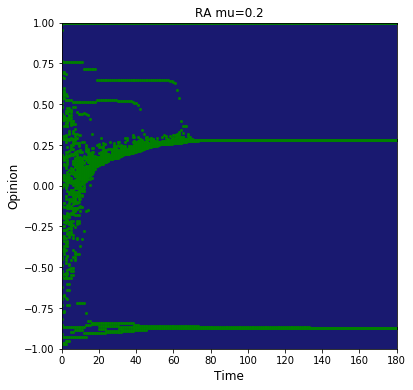

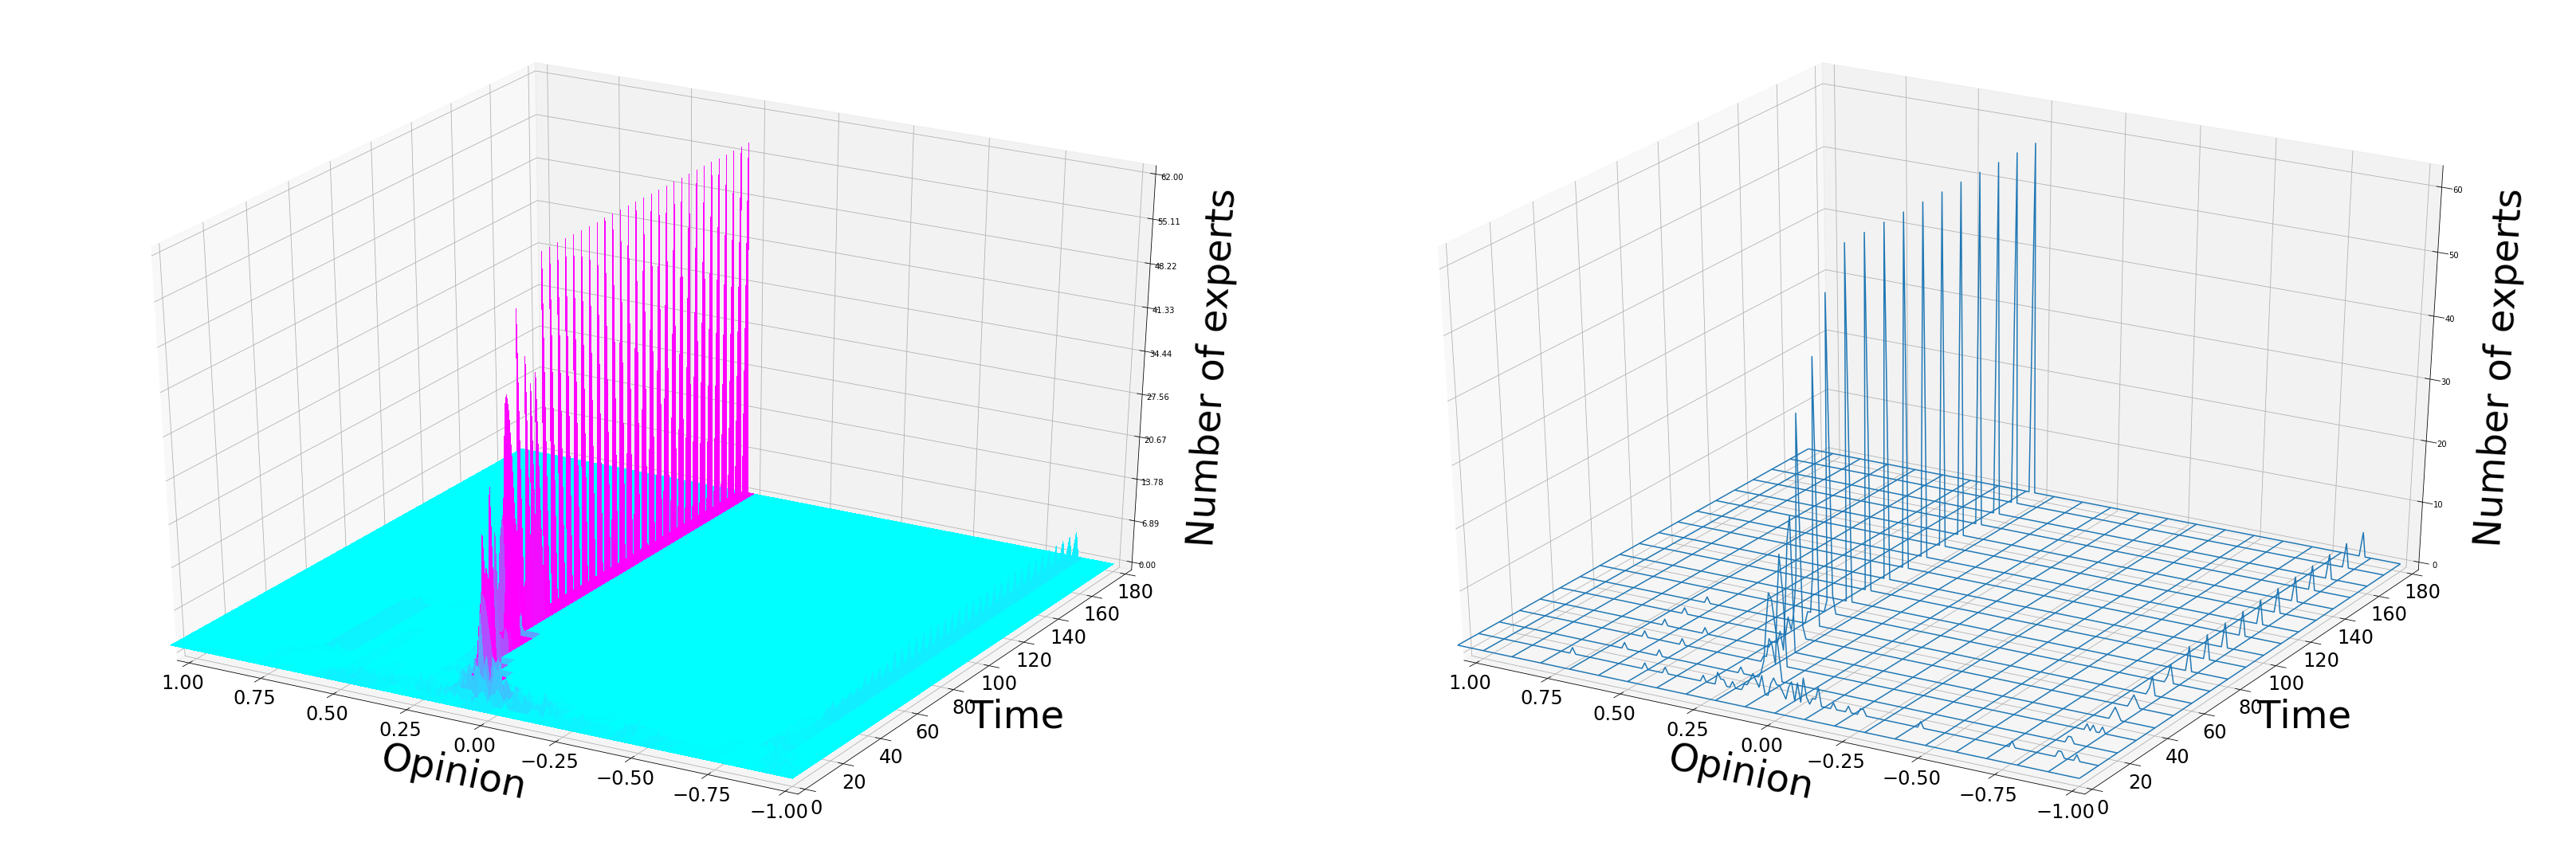

In [349]:


# X = step
# Y = opinions
# opinions = ["{:.1f}".format(o) for o in opinions]

current_step = 0

        
# Make data.
X = np.arange(-1, 1.1, 0.01)
n_opinions = len(X)
n_steps = 180
Y = np.arange(0, n_steps+1, 1)
X, Y = np.meshgrid(X, Y)

def f(x, y):
    value = counter[y][str(x)]
    return value

Z = np.array([0]*n_opinions)
maximum_z = 1
for i in range(180):
    
    temp = np.zeros(n_opinions)
    
    for j in range(n_opinions):
        
        x_part = X[i][j]
        y_part = Y[i][j]
        temp[j] = (f(x_part, y_part))
        
        maximum_z = max(maximum_z, temp[j])
        
    Z = np.vstack((Z, temp))
    
label_font_size = 48
width = 15

fig = plt.figure(figsize=(6,6))

plt.xlabel('Time', fontsize=label_font_size/4)
plt.ylabel('Opinion', fontsize=label_font_size/4)
plt.title(model_name +" mu=0.2", fontsize=label_font_size/4)
# p3 = scatter(step, smiddle, step, slower, step, supper)
ax=plt.axes()
# ax.set_facecolor('midnightblue')
p3 = plt.scatter(step, opinions, c="green", s=4)
plt.xlim(xmin=0, xmax=180)
plt.ylim(ymin=-1, ymax=1)
ax.set_facecolor('midnightblue')

plt.show()

# FIRST FIGURE WITH COLOR MAP
# ============================================



fig = plt.figure(figsize=(width*3,width))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(1, 2, 1, projection='3d')

cmap = cm.cool
norm = colors.Normalize(vmin=0, vmax=6)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, norm=norm, linewidth=0, antialiased=False)

# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.set_xlim(1, -1)
ax.set_ylim(0, 180)
ax.set_zlim(0, maximum_z + 5)
ax.set_xlabel('Opinion', fontsize=label_font_size, labelpad=30)
ax.set_ylabel('Time', fontsize=label_font_size, labelpad=30)
ax.set_zlabel('Number of experts', fontsize=label_font_size, labelpad=30)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


# SECOND FIGURE WITH COLOR MAP
# ============================================

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

ax.set_xlim(1, -1)
ax.set_ylim(0, 180)
ax.set_zlim(0, maximum_z + 5)
ax.set_xlabel('Opinion', fontsize=label_font_size, labelpad=30)
ax.set_ylabel('Time', fontsize=label_font_size, labelpad=30)
ax.set_zlabel('Number of experts', fontsize=label_font_size, labelpad=30)
fig.tight_layout()

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# ax.set_zticks(fontsize=24)
plt.show()

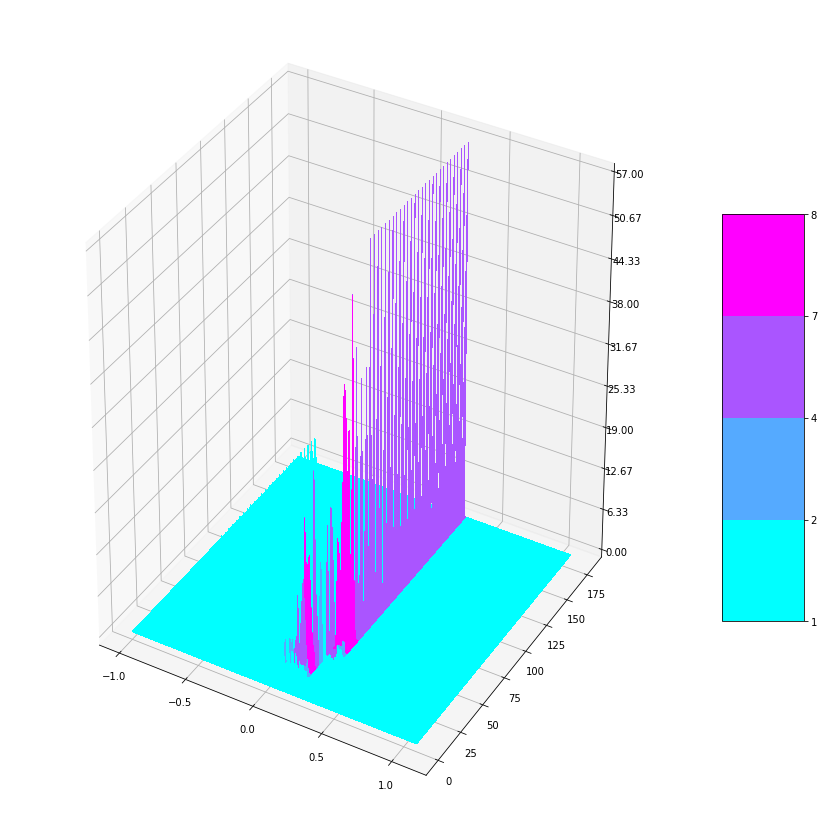

In [363]:
step = []
opinions = []
cs = []

model_name = 'RA'

with open(model_name+'opinions.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    for row in readCSV:
        ntime=row[1]
        for opinion in row[4:]:
            if opinion != ' ':
                opinions.append(float(opinion))
                step.append(float(ntime))

n_opinions = 21
Z = []
current_step = 0
opinion_counter = defaultdict(lambda:0)

rounded_opinions = ["{:.2f}".format(o) for o in opinions]
# print(first)
# print(len(first))

counter = {}
for step_num in range(180):
    cnt = Counter({x:0 for x in cnt})
    for o in range(len(rounded_opinions)):
        if step[o] == step_num:
            cnt[rounded_opinions[o]] += 1
    counter[step_num] = cnt

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-1, 1.1, 0.01)
n_opinions = len(X)
n_steps = 180
Y = np.arange(0, n_steps+1, 1)
X, Y = np.meshgrid(X, Y)

def f(x, y):
    value = counter[y][str(x)]
    return value

Z = np.array([0]*n_opinions)
maximum_z = 1
for i in range(180):
    
    temp = np.zeros(n_opinions)
    
    for j in range(n_opinions):
        
        x_part = X[i][j]
        y_part = Y[i][j]
        temp[j] = (f(x_part, y_part))
        
        maximum_z = max(maximum_z, temp[j])
        
    Z = np.vstack((Z, temp))
    
cmap = cm.cool
# norm = colors.Normalize(vmin=0, vmax=6)


bounds = [1, 2, 4, 7, 8]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, norm=norm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
# fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax, orientation='horizontal', label='Some Units')

plt.show()